# Tracer concentration on shelf bottom

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [23]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import pandas as pd

import os 

import sys

import seaborn as sns


In [24]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [25]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [26]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [27]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]

labelsListFlat = ['Base flat',
                  'f=7.68E-5 flat',
                  'f=4.84E-5 flat',
                  'kv=1E-4 flat',
                  'kv=1E-3 flat',
                  'N=3.9E-3 flat',
                  'N=6.3E-3 flat',
                  'N=3.0E-3 flat',
                  'kv=1E-7 flat',
]


In [28]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [29]:
fileCanyon = 'results/metricsDataFrames/bottomConcentrationAreaCanyonRuns.csv'

df = pd.read_csv(fileCanyon)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyon = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyon[:,ii] = df[col] 
    ii=ii+1


In [30]:
fileFlat = 'results/metricsDataFrames/bottomConcentrationAreaFlatRuns.csv'

df2 = pd.read_csv(fileFlat)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlat = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlat[:,ii] = df2[col] 
    ii=ii+1



In [31]:
colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst",
          "lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)


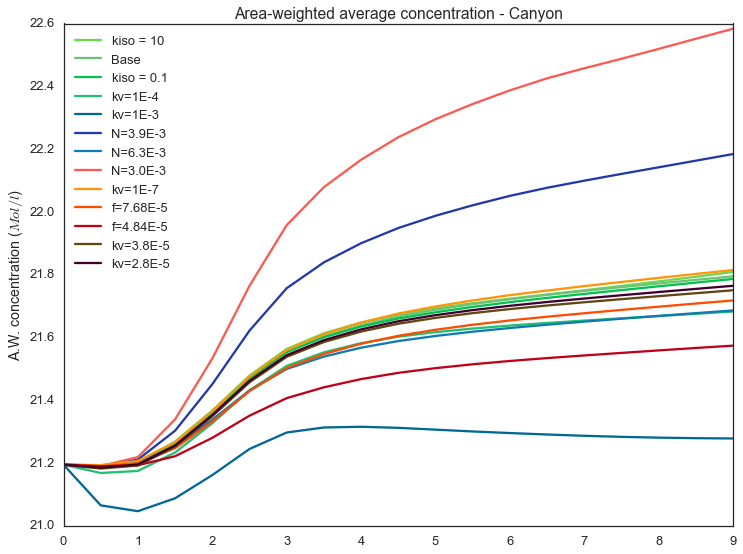

In [32]:
sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


In [35]:
df

,Unnamed: 0,day,ConcArea02,ConcArea03,ConcArea04,ConcArea11,ConcArea12,ConcArea14,ConcArea15,ConcArea16,ConcArea17,ConcArea18,ConcArea19,ConcArea20,ConcArea21
0,0,NaN,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412,21.194412
1,1,NaN,21.187270,21.189925,21.192309,21.167963,21.064856,21.189695,21.190918,21.190027,21.193040,21.189685,21.189248,21.182066,21.184719
2,2,NaN,21.201881,21.201821,21.202731,21.174439,21.046225,21.210729,21.200964,21.218586,21.206309,21.198245,21.192615,21.191671,21.195010
3,3,NaN,21.268238,21.262005,21.259337,21.233267,21.087456,21.302730,21.253682,21.338912,21.265941,21.247100,21.221367,21.252135,21.255522
4,4,NaN,21.367218,21.360088,21.358959,21.326494,21.161323,21.450883,21.338012,21.532668,21.364506,21.331733,21.279948,21.348577,21.352548
5,5,NaN,21.478217,21.470344,21.470015,21.431476,21.244431,21.621622,21.431014,21.764401,21.475527,21.428657,21.350577,21.456891,21.461516
6,6,NaN,21.563126,21.553592,21.552824,21.509059,21.296890,21.756774,21.499248,21.957724,21.559655,21.502725,21.406435,21.537988,21.543329
7,7,NaN,21.612998,21.603030,21.600460,21.552381,21.312946,21.838970,21.538816,22.078648,21.610051,21.546944,21.440961,21.585139,21.591238
8,8,NaN,21.647414,21.639001,21.634320,21.581649,21.315172,21.900014,21.567095,22.166063,21.647087,21.579750,21.467082,21.618558,21.625501
9,9,NaN,21.673004,21.666652,21.659965,21.602205,21.311794,21.948402,21.588259,22.237757,21.675883,21.605005,21.487010,21.643500,21.651337
